1    500
0    500
Name: Liked, dtype: int64


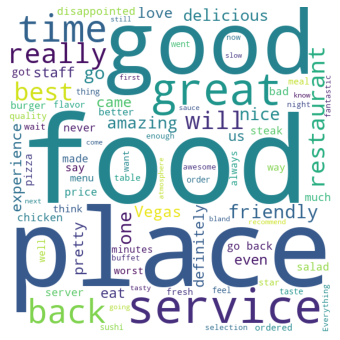

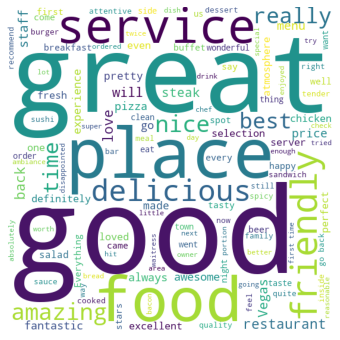

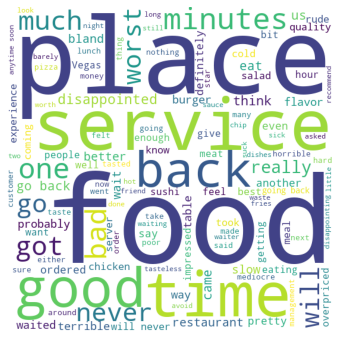

In [ ]:
import pandas as pd

data=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
data.head()
print(data.Liked.value_counts())
from wordcloud import WordCloud
from wordcloud import STOPWORDS

import matplotlib.pyplot as plt 


def word_cloud(text):

    
    stopword_list = set(STOPWORDS) 

     
    word_cloud = WordCloud(width = 550, height = 550, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 12).generate(text) 


    plt.figure(figsize = (8, 6)) 


    plt.imshow(word_cloud) 

    
    plt.axis("off")  


    plt.show()
    
paragraph=' '.join(data.Review.tolist())
word_cloud(paragraph)

paragraph=' '.join(data[data.Liked==1].Review.tolist())
word_cloud(paragraph)
paragraph=' '.join(data[data.Liked==0].Review.tolist())
word_cloud(paragraph)
# Bag of word: vectors word frequency(count)
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from data like symbols

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)

text_counts= cv.fit_transform(data['Review'])

print(text_counts.shape)

count_df = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())
count_df.head()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, 
                                                    data['Liked'], 
                                                    test_size=0.3, 
                                                    random_state=1)
from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))
# Transform into matrix
val=cv.transform(["Service of the restaurant is very slow but food was delicous"])

# make prediction
clf.predict(val)

In [ ]:
import joblib


In [ ]:
joblib.dump(clf,'major project.joblib')

In [ ]:
model=joblib.load('major project.joblib')

In [ ]:
val=cv.transform(["waste bad"])

In [ ]:
model.predict(val)

In [ ]:
val=cv.transform(['the food was not ok biryani and cococola are better to choose from menu'])

In [ ]:
model.predict(val
            )